In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier

In [3]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [6]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [7]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [8]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,False,True


In [9]:
# Select relevant columns 
relevant_columns = ['Survived','Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S']

# Filter the the dataframe only include relevent columns 
titanic_df = titanic_df[relevant_columns]

# Handle missing values in 'age' column by filling with median age
titanic_df['Age'].fillna(titanic_df['Age'].median(),inplace=True)

# Split the data into features (X) and target (y)
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

# Split the data into training (70%) and remaining (30%)
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split the remaining data into development (15%) and test (15%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X_dev, y_dev, test_size=0.5, random_state=42, stratify=y_dev)

# Lets verify the splits
print(f'Training set size:{X_train.shape[0]},{y_train.shape[0]}')
print(f'Development set size:{X_dev.shape[0]},{y_dev.shape[0]}')
print(f'Test set size:{X_test.shape[0]},{y_test.shape[0]}')


Training set size:623,623
Development set size:134,134
Test set size:134,134


C:\Users\seenz\AppData\Local\Temp\ipykernel_20444\2035813775.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(),inplace=True)


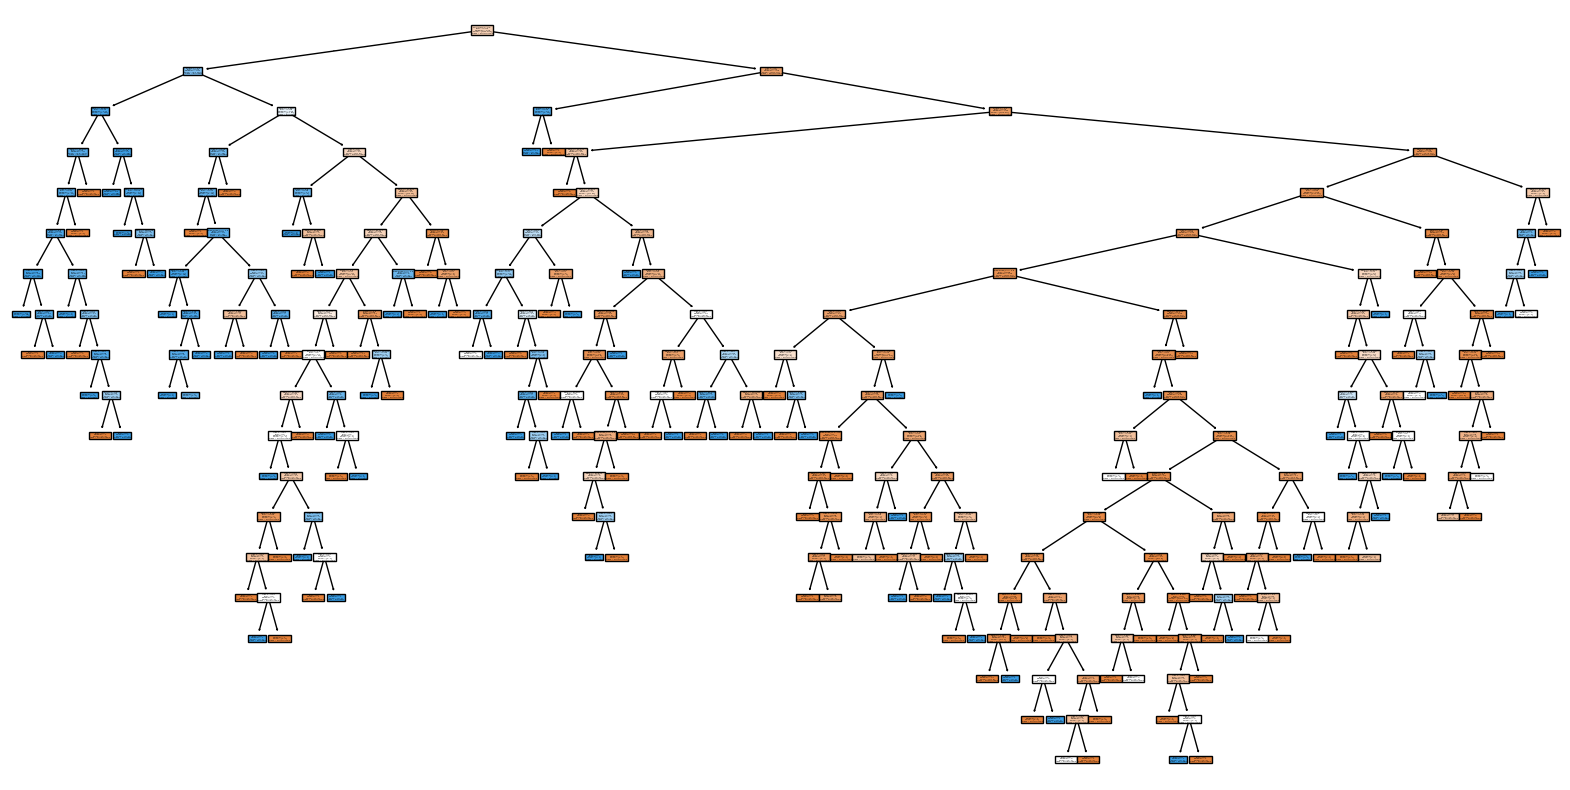

In [10]:
# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.show()

In [11]:
# Compute your model accuracy on the development set
y_dev_pred = clf.predict(X_dev)
dev_accuracy = accuracy_score(y_dev, y_dev_pred)

print(f'Development set accuracy: {dev_accuracy:.4f}')

Development set accuracy: 0.7985


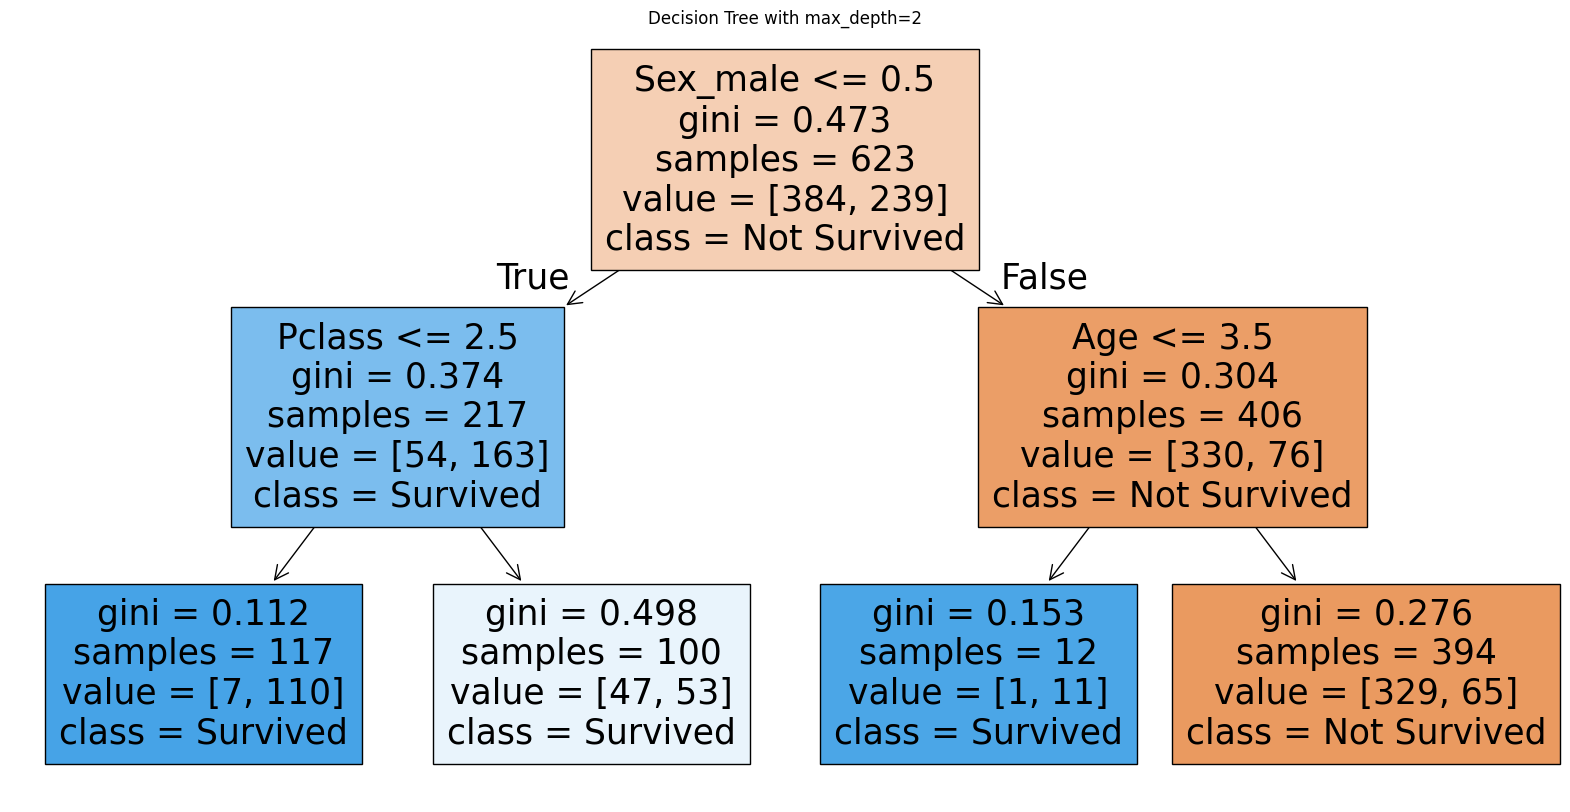

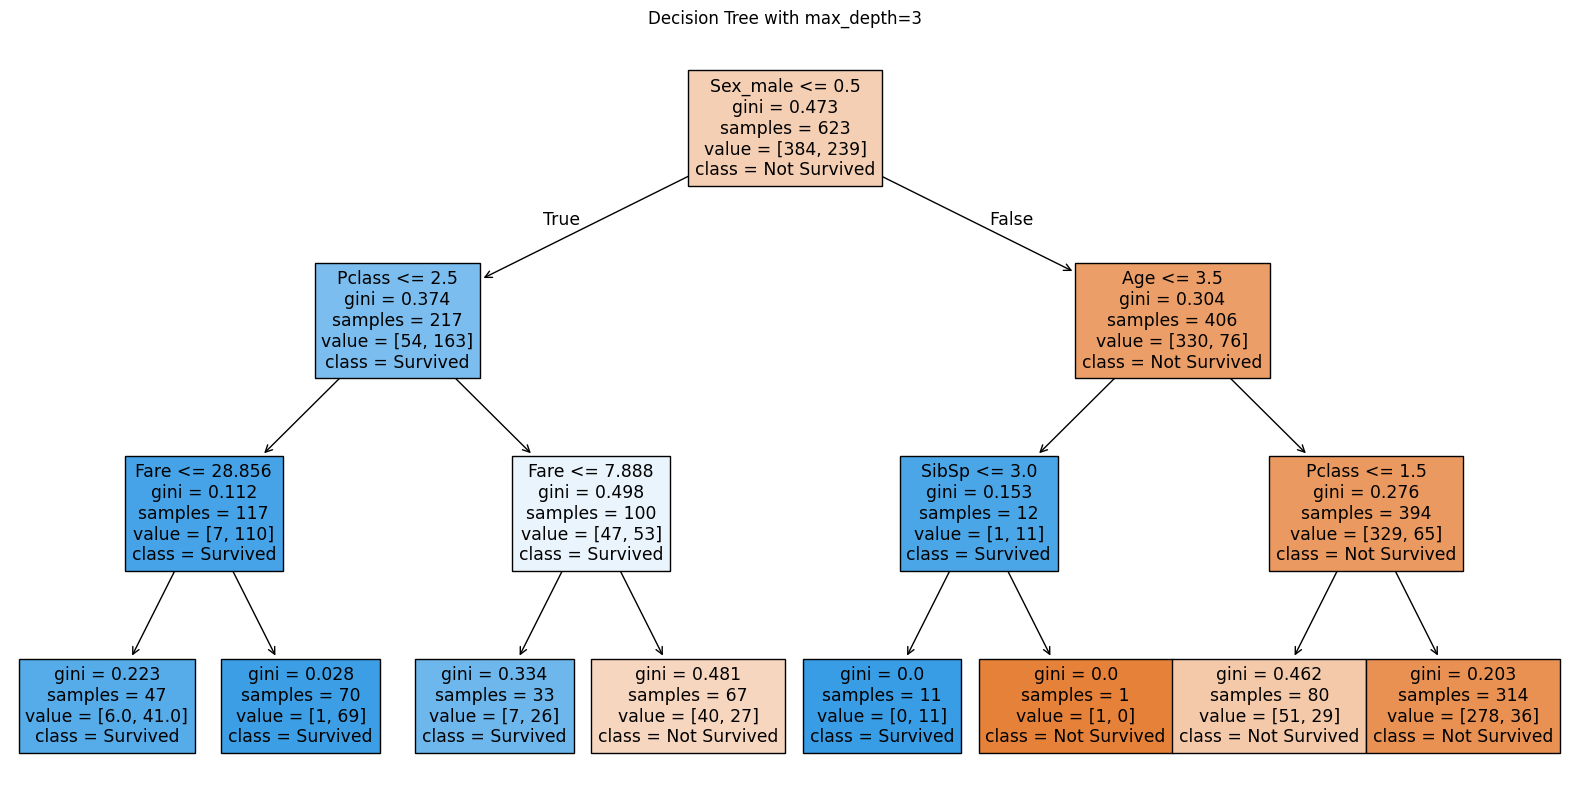

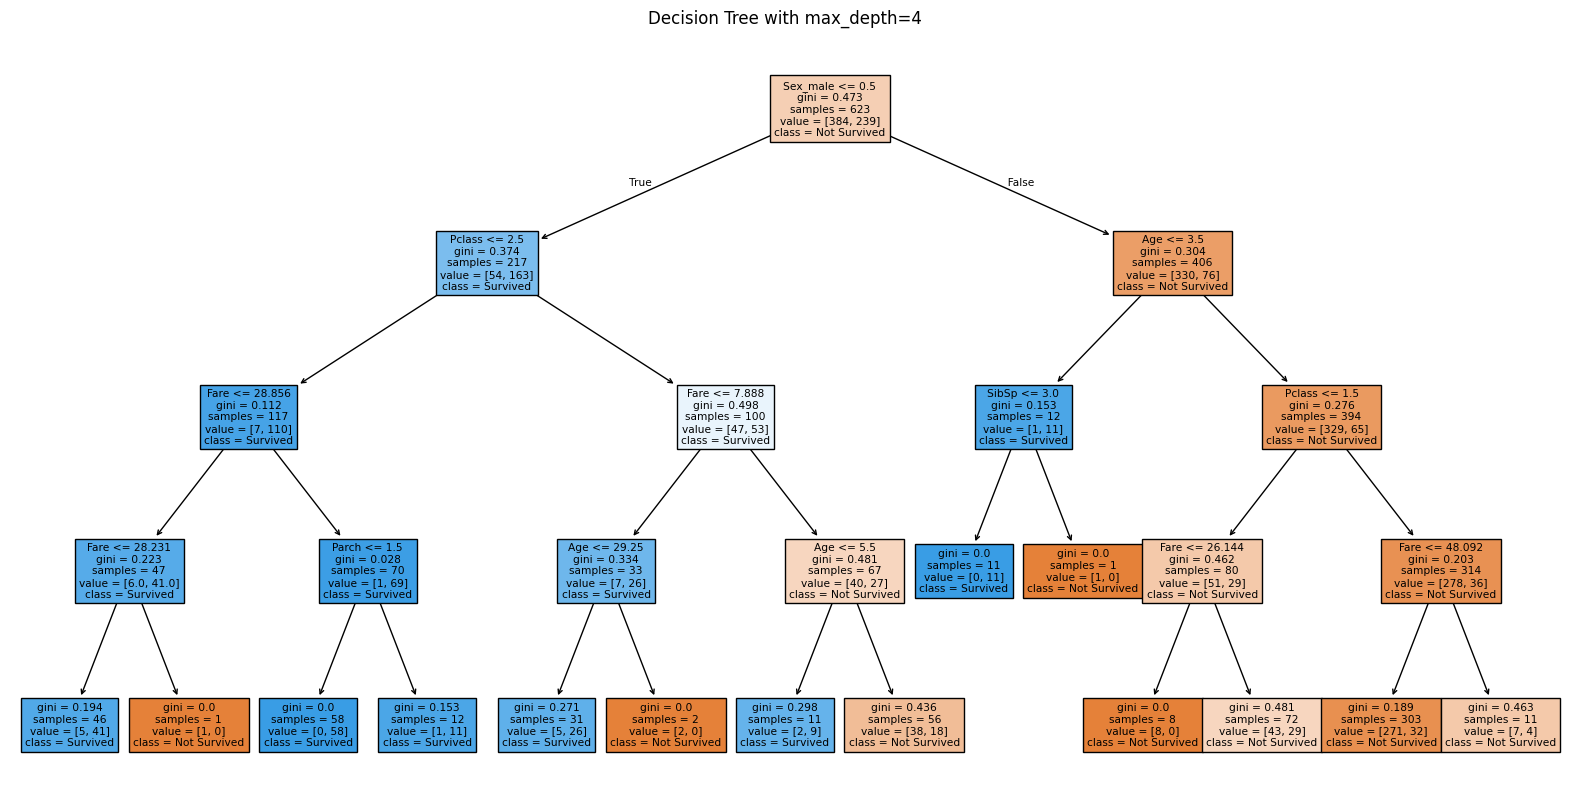

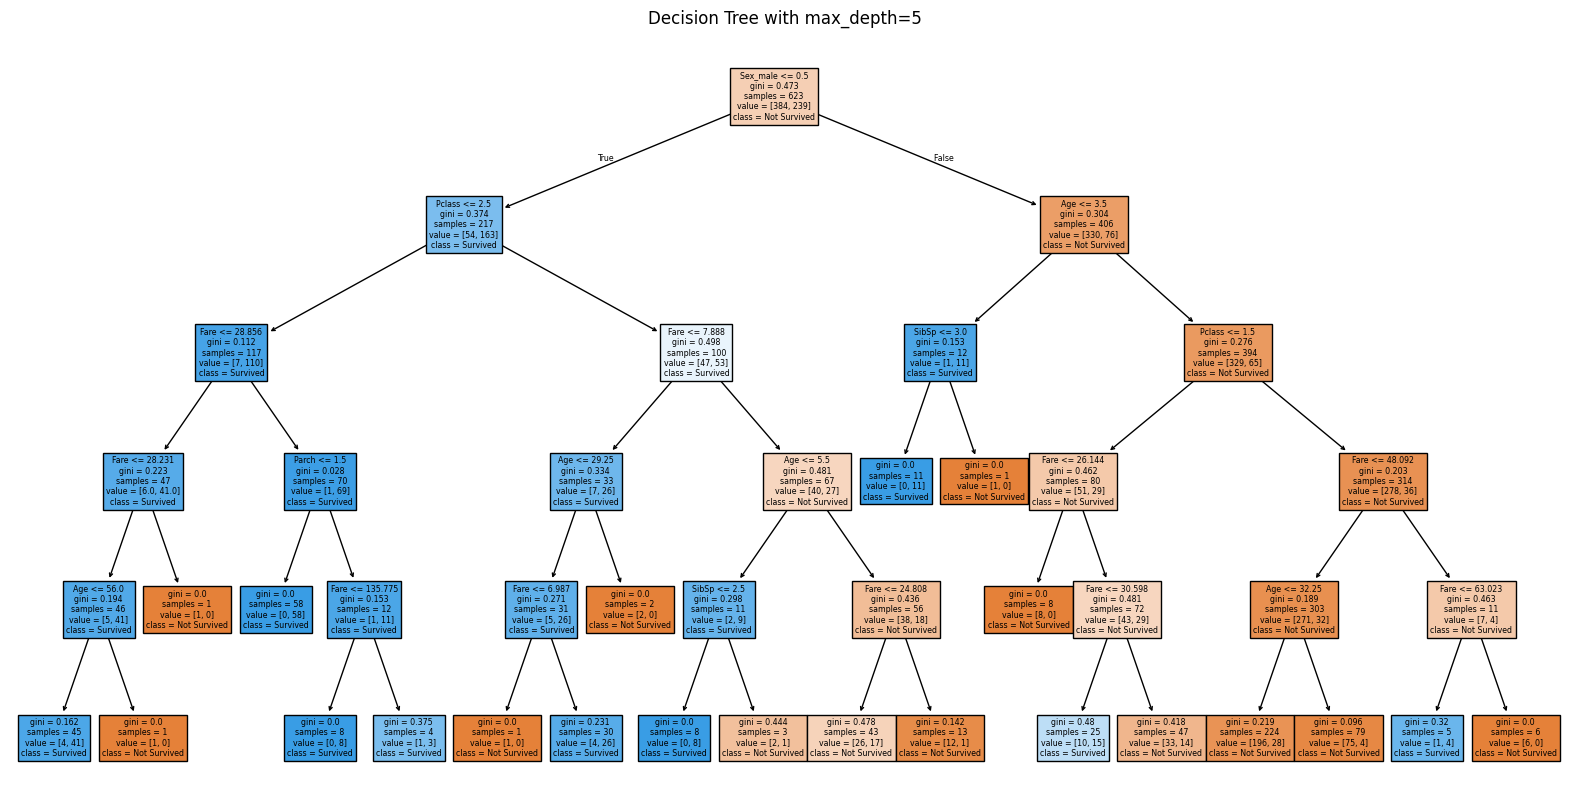

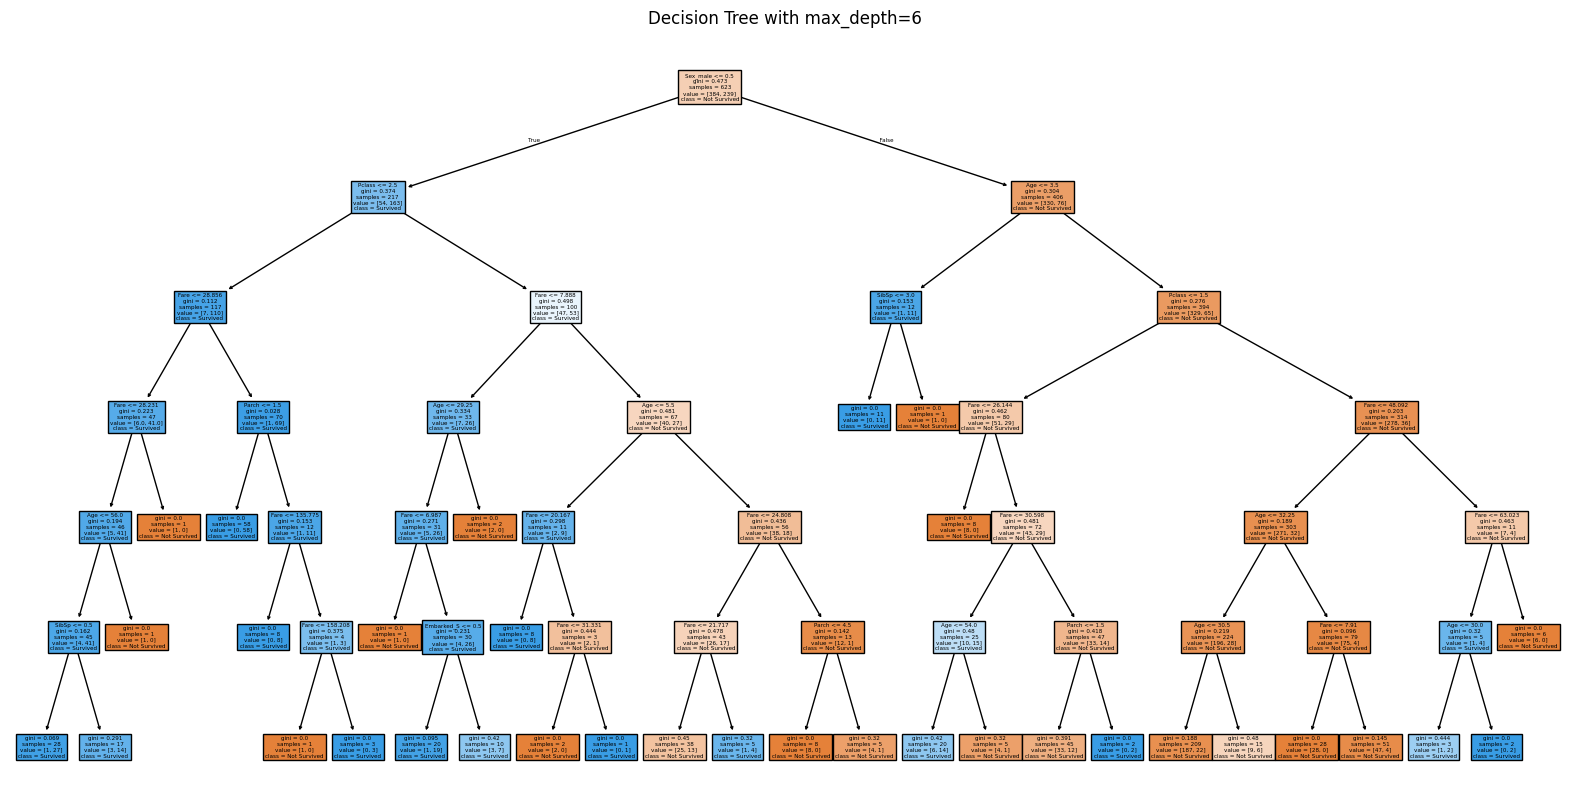

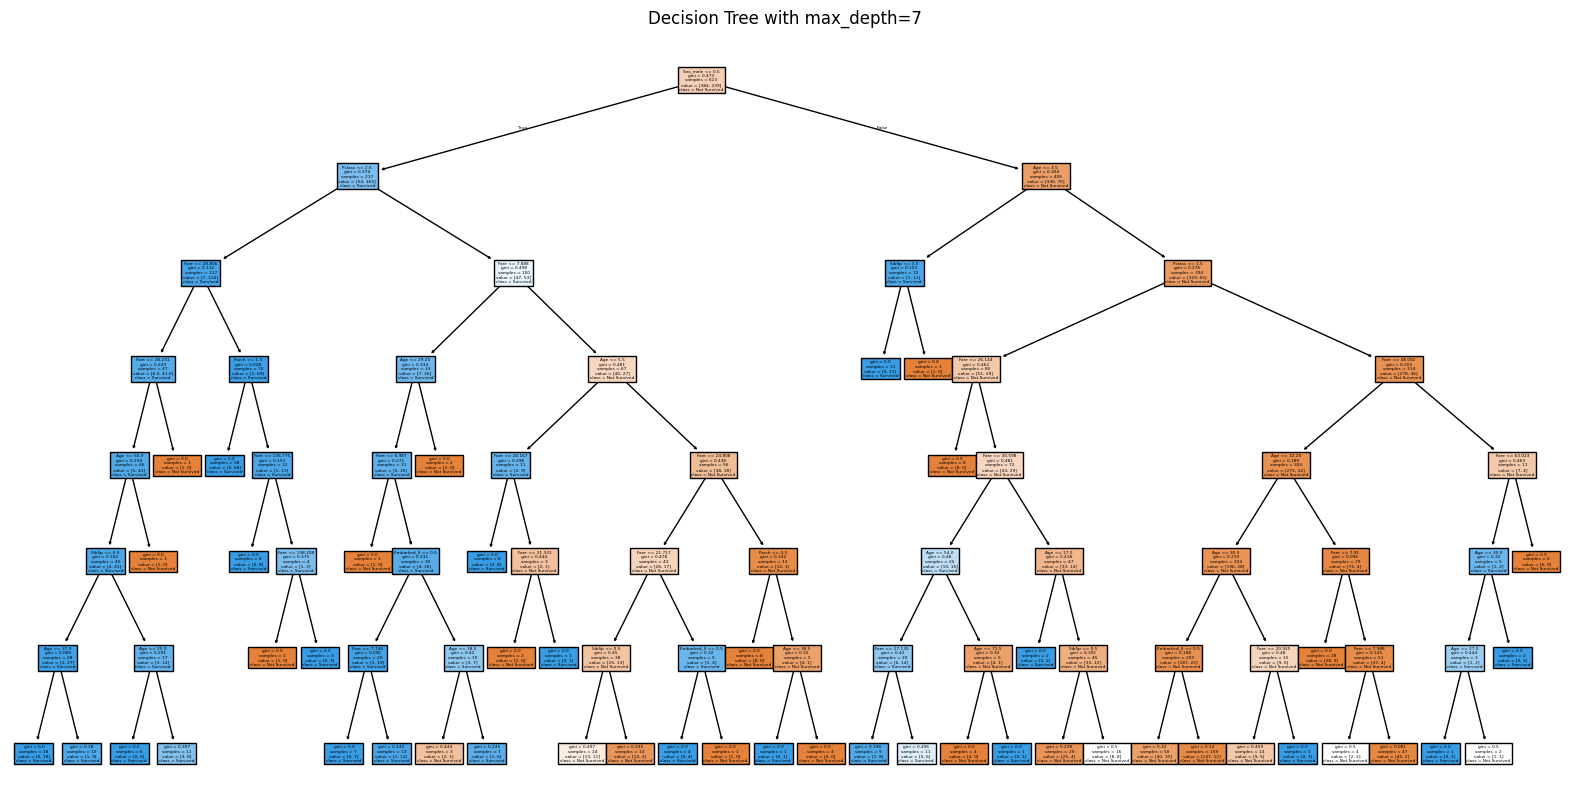

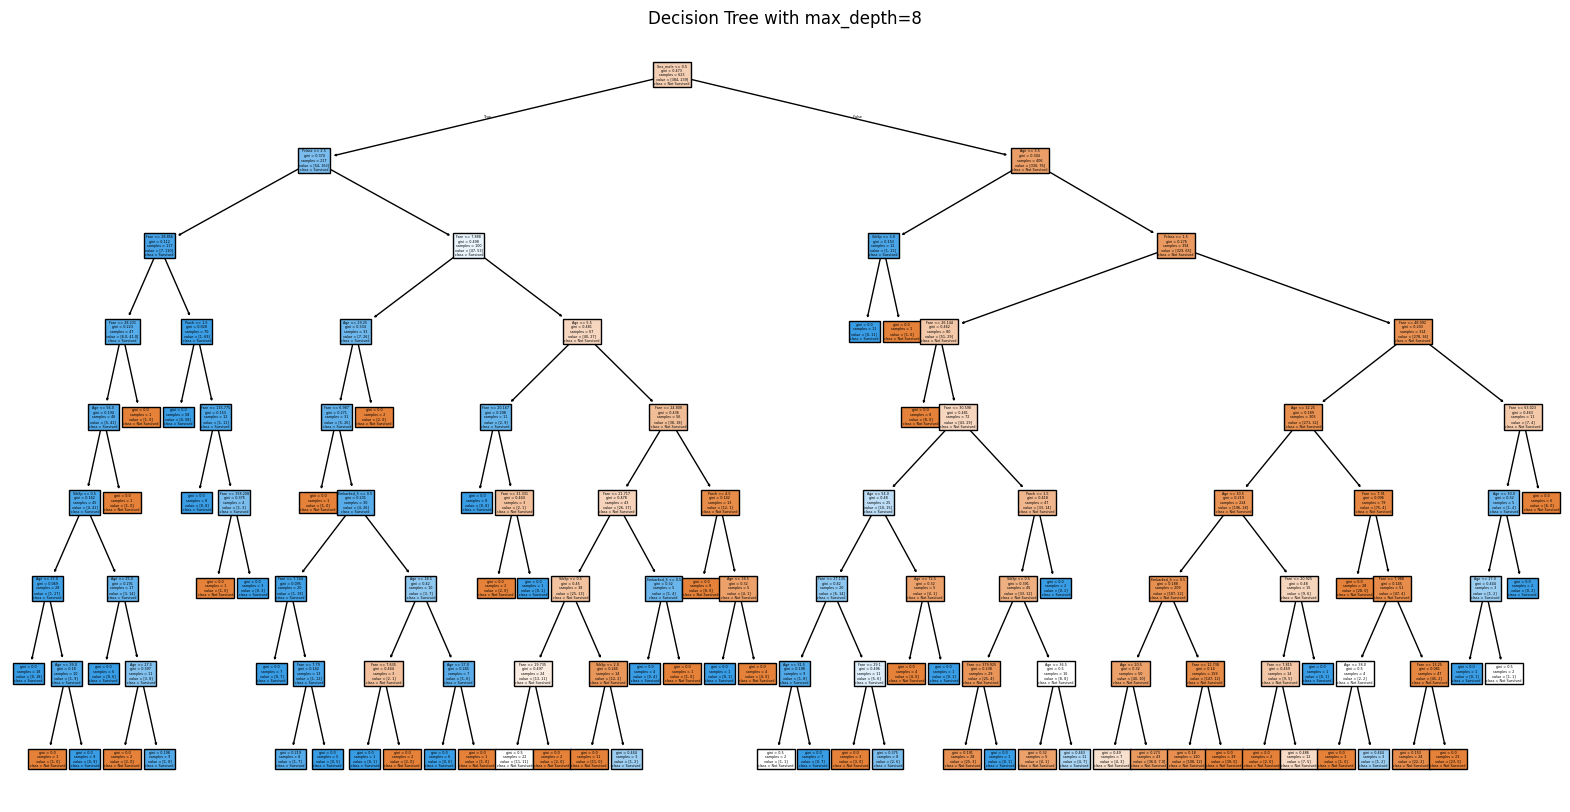

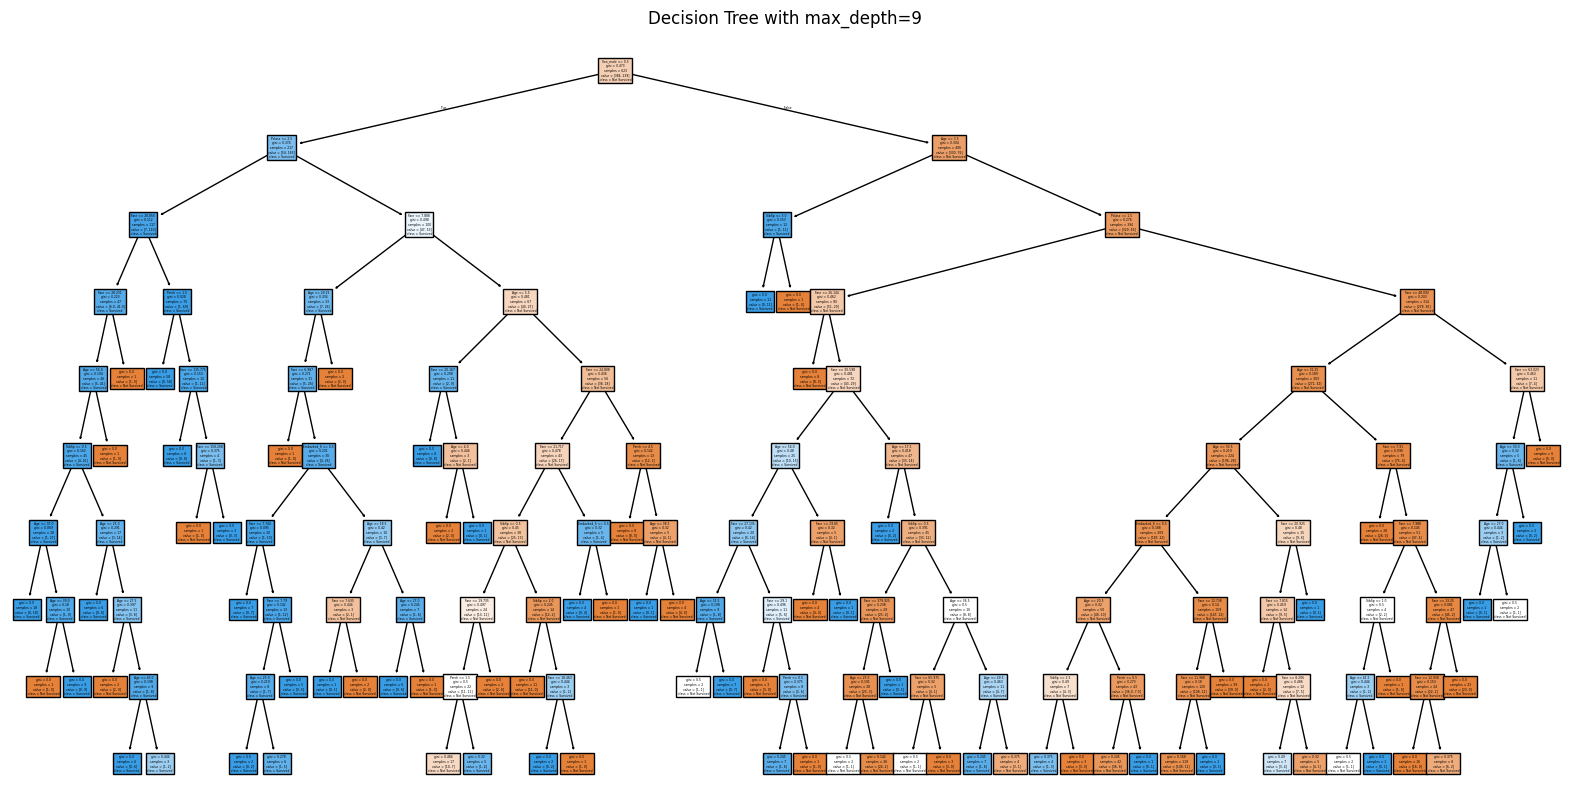

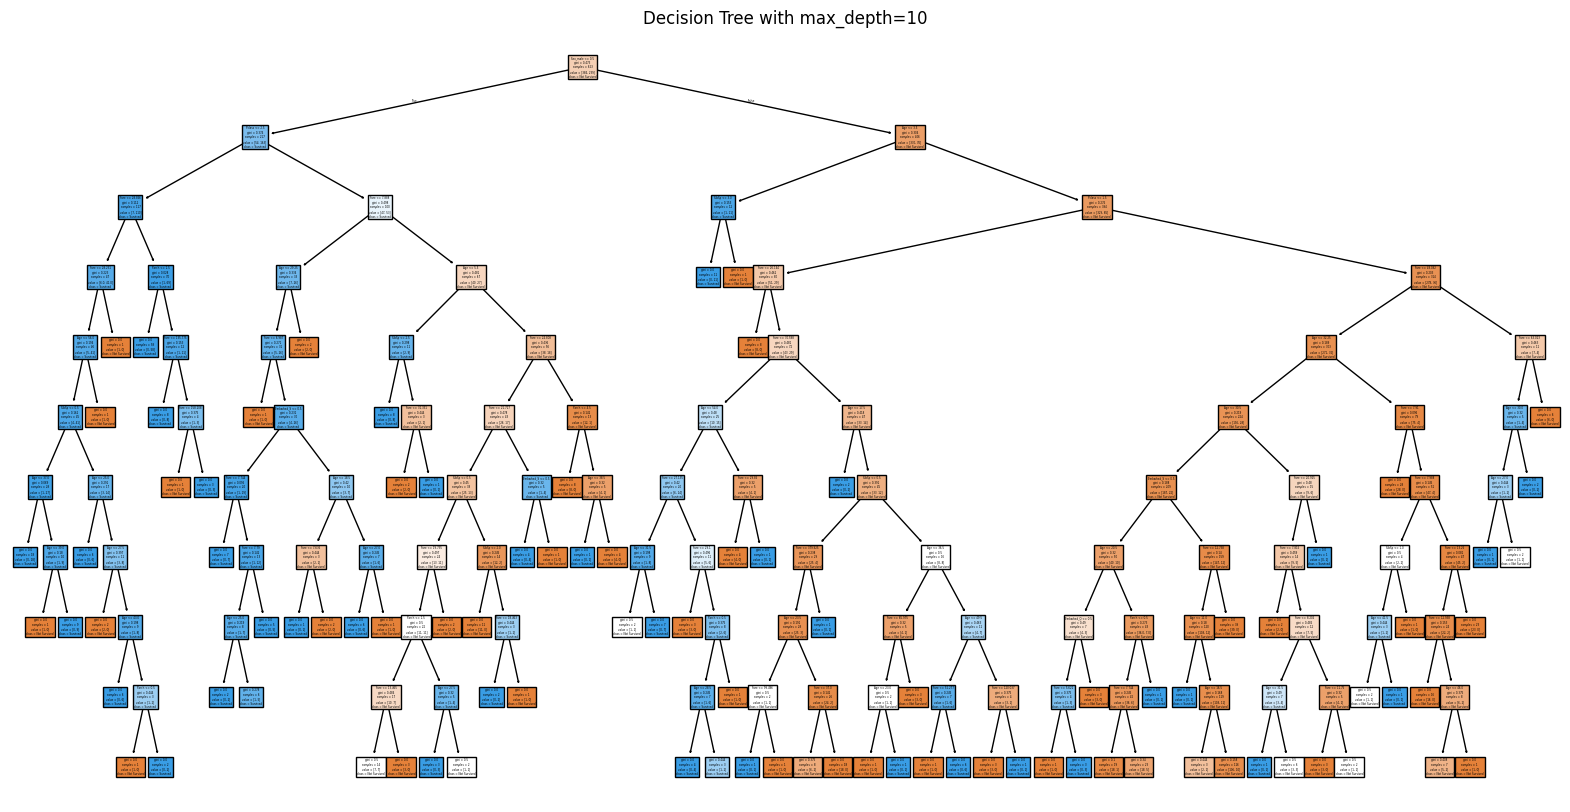

max_depth=10 - Training accuracy: 0.9390, Development accuracy: 0.7985


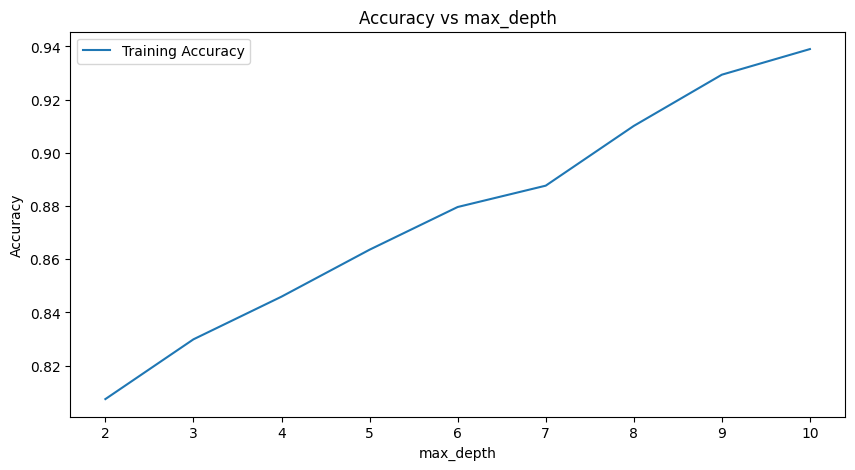

In [12]:
# list to store accuracies
train_accuracies = []
dev_accuracies = []

# Loop through different values of max_depth
for max_depth in range(2, 11):
    # Train a decision tree classifier with the current max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)

    # Predict on training  and development sets
    y_train_pred = clf.predict(X_train)
    y_dev_pred = clf.predict(X_dev)

    # Compute accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    dev_accuracy = accuracy_score(y_dev, y_dev_pred)

    # Store accuracies
    train_accuracies.append(train_accuracy)
    dev_accuracies.append(dev_accuracy)

    # Plot the decision tree 
    plt.figure(figsize=(20, 10))
    plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Survived','Survived'])
    plt.title(f'Decision Tree with max_depth={max_depth}')
    plt.show()

    # Print accuracies for the current max_depth
print(f'max_depth={max_depth} - Training accuracy: {train_accuracy:.4f}, Development accuracy: {dev_accuracy:.4f}')

# Plot accuracies
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), train_accuracies,label='Training Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs max_depth')
plt.legend()
plt.show()

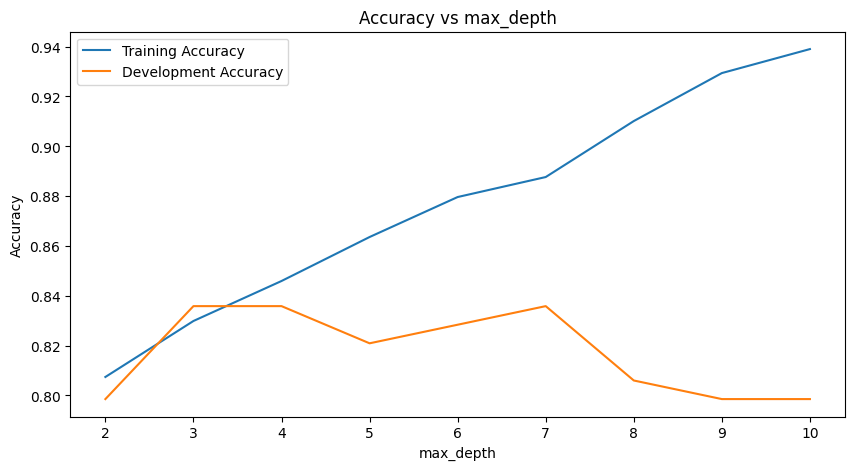

In [13]:
# plot accuries
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), train_accuracies, label='Training Accuracy')
plt.plot(range(2, 11), dev_accuracies, label='Development Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs max_depth')
plt.legend()
plt.show()

# The explanation of the shape of lines
> Training Accuracy line: The training accuracy typically increases max_depth increases because a deeper tree can capture more details and patterns in the training data. However, if the tree becomed too deep, it nay lead to overfitting, where the model performs very well on the training data but poorly on unseen data.

> Development Accuracy Line: The development accuracy generally increases  initially with increasing max_depth as the model becomes more capable of capturing patterns in the data. However, after a certain point, the accuracy may start to decrease or plateau due to overfitting. A very deep tree can become too complex and tailor itself too closely to training data, leading to worse performance on the development set.

# Interpretation of the shapes
> Overfitting: If the training accuracy continues to increase while the development accuracy staarts decrease, this indicates overfitting. The model is learning  noise and detailsspeecific to the training data that do not generalize well to new data.
> Optimal Depth: The point where thevdevelopment accuracy is highest before it starts to decrease indicates the optimal depth. This is best trade-off between bias and variance, providing a model that generalizes well to unseen data.

Optimal max_depth:3
Test accuracy:0.7537


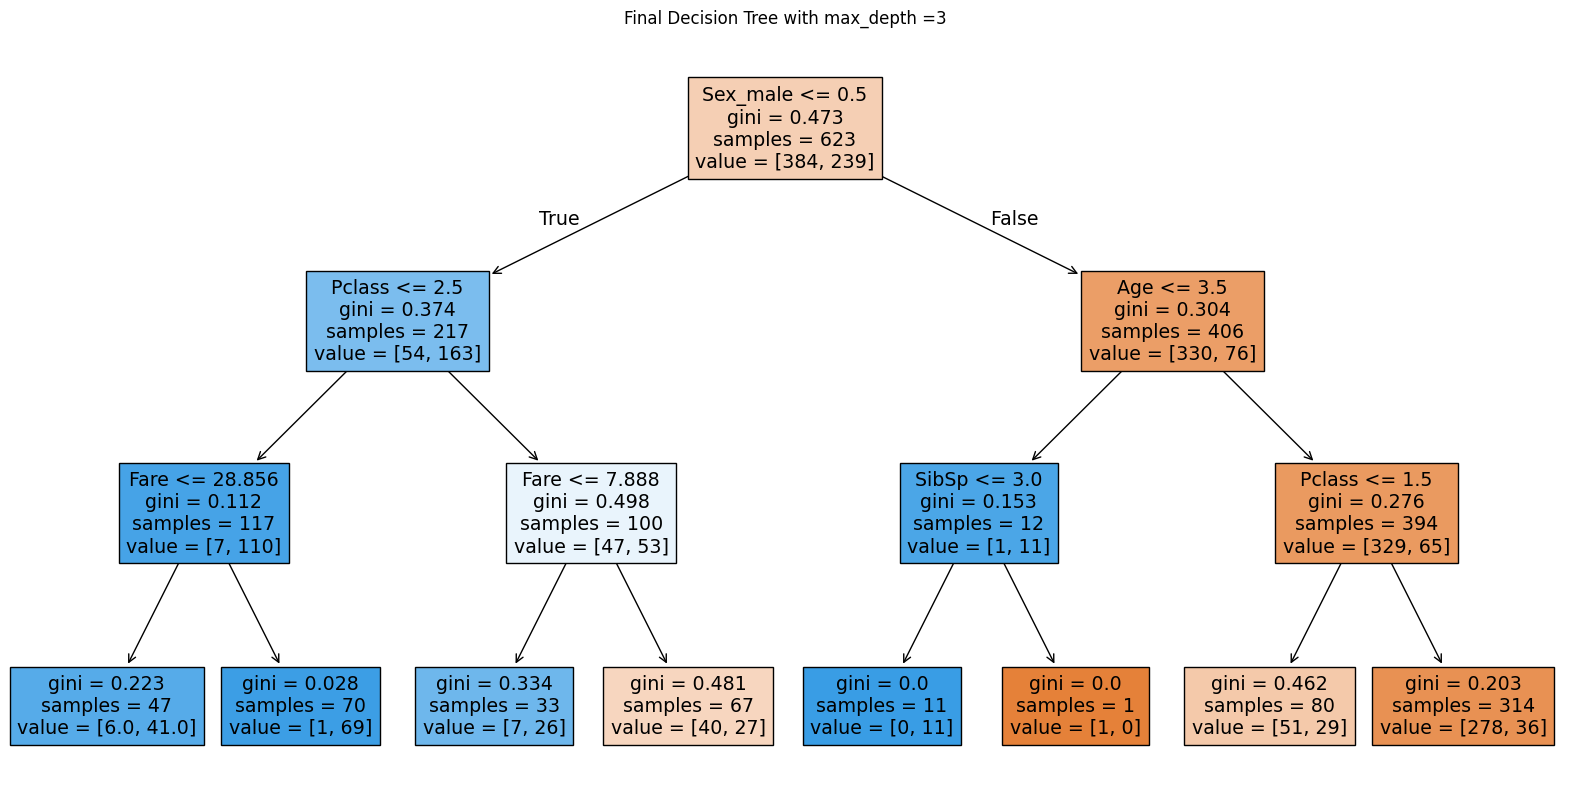

In [14]:
# Identifiy the optimal max_depth(where development accuracy is highest)
optimal_max_depth = dev_accuracies.index(max(dev_accuracies))+2  # +2 to match the range start at 2
print(f'Optimal max_depth:{optimal_max_depth}')

# Train the final model using the optimal max_depth
final_clf = DecisionTreeClassifier(max_depth=optimal_max_depth, random_state=42)
final_clf.fit(X_train, y_train)

# Evaluate the final model on the test set
y_test_pred = final_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test accuracy:{test_accuracy:.4f}')

# Plot the final decision tree
plt.figure(figsize=(20, 10))
plot_tree(final_clf,filled=True, feature_names=X.columns) 
plt.title(f'Final Decision Tree with max_depth ={optimal_max_depth}')
plt.show()

In [16]:
# Train Bagging, RandomForest, and Boosted models
bagging_clf = BaggingClassifier(n_estimators=100, random_state=42)
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
boosted_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model
bagging_clf.fit(X_train, y_train)
random_forest_clf.fit(X_train, y_train)
boosted_clf.fit(X_train, y_train)

# Predict on the development set
bagging_dev_pred = bagging_clf.predict(X_dev)
random_forest_dev_pred = random_forest_clf.predict(X_dev)
boosted_dev_pred = boosted_clf.predict(X_dev)

# Calculate accuracy
bagging_dev_accuracy = accuracy_score(y_dev, bagging_dev_pred)
random_forest_dev_accuracy = accuracy_score(y_dev, random_forest_dev_pred)
boosted_dev_accuracy = accuracy_score(y_dev, boosted_dev_pred)

print(f'Bagging Model Development Accuracy:{bagging_dev_accuracy:.4f}')
print(f'Random Forest Model Development Accuracy:{random_forest_dev_accuracy:.4f}')
print(f'Boosted Model Development Accuracy:{boosted_dev_accuracy:.4f}')

Bagging Model Development Accuracy:0.8284
Random Forest Model Development Accuracy:0.8284
Boosted Model Development Accuracy:0.8358


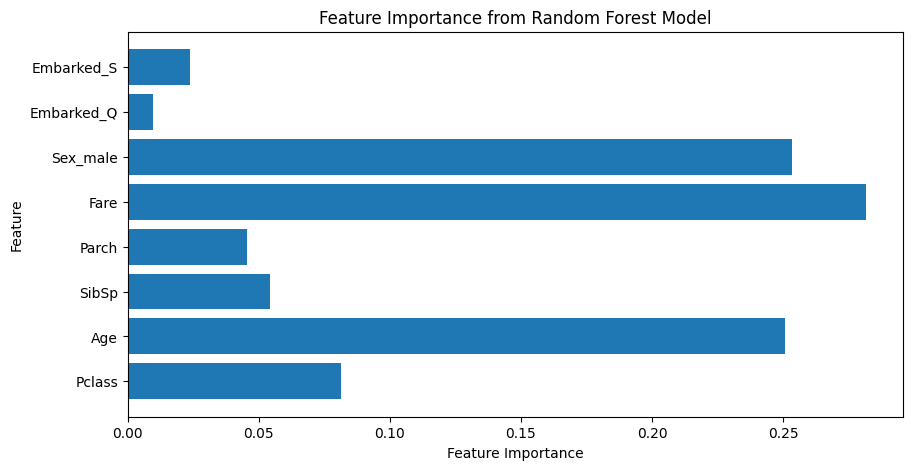

In [17]:
# Determine feature importance from the Random Forest model
feature_importances = random_forest_clf.feature_importances_
features = X.columns

# Plot feature importances 
plt.figure(figsize=(10, 5))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest Model')
plt.show()

In [18]:
# Tune n_estimators and max_depth for the best performing model
param_grid = {'n_estimators':[50, 100, 200],
              'max_depth':[None, 10, 20, 30]
              }

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f'Best Parameters:{best_params}')

Best Parameters:{'max_depth': 10, 'n_estimators': 200}


In [19]:
# Report final accuracies
bagging_test_pred = bagging_clf.predict(X_test)
random_forest_test_pred = random_forest_clf.predict(X_test)
boosted_test_pred = boosted_clf.predict(X_test)

bagging_test_accuracy = accuracy_score(y_test, bagging_test_pred)
random_forest_test_accuracy = accuracy_score(y_test, random_forest_test_pred)
boosted_test_accuracy = accuracy_score(y_test, boosted_test_pred)

print(f'Bagging Model Test Accuracy:{bagging_test_accuracy:.4f}')
print(f'Random Forset Model Test Accuracy:{random_forest_test_accuracy:.4f}')
print(f'Boosted Model Test Accuracy:{bagging_dev_accuracy:.4f}')

Bagging Model Test Accuracy:0.7687
Random Forset Model Test Accuracy:0.7687
Boosted Model Test Accuracy:0.8284


In [20]:
# Identify the best perfoming model
accuracies = {'Bagging':
            bagging_test_accuracy,
              'Random Forest':
            random_forest_dev_accuracy,
               'Boosted':
            boosted_test_accuracy
            }

best_model_name = max(accuracies, key=accuracies.get)
best_model_accuracy = accuracies[best_model_name]

print(f'The best performing model is {best_model_name} with an accuracy of {best_model_accuracy:.4f}')
print(f'The best Random Forest model had n_estimators = {best_params["n_estimators"]} and max_depth = {best_params["max_depth"]}')

The best performing model is Random Forest with an accuracy of 0.8284
The best Random Forest model had n_estimators = 200 and max_depth = 10
